In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn
from textwrap import wrap

In [2]:
file_path = "/Users/aryellewright/Documents/Kumar-Biomaterials-Lab/PicoGreen_Plots/20231016_PicoGreenAssay_PolymerScreen1_AW_pDNA80_NP5_pDNAcorrection.xlsx" 
sheet_name = "Sheet3"  

df = pd.read_excel(file_path, sheet_name=sheet_name)


In [3]:
polyplex = df['Polyplex']
avg = df['Avg. ']
stdev = df['Std']


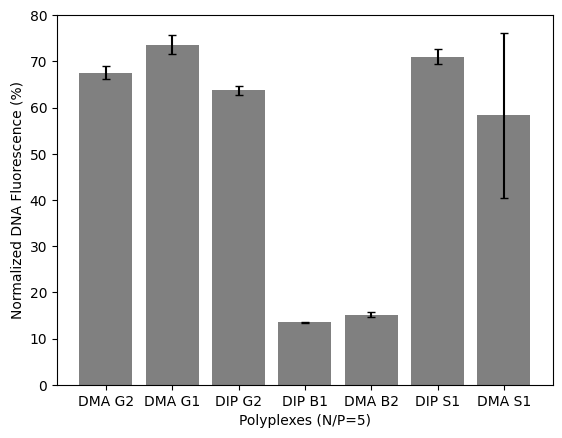

In [6]:
plt.bar(polyplex, avg, yerr=stdev, capsize = 3, color='gray')
#plt.xticks(df['Polymer'])
plt.xlabel('Polyplexes (N/P=5)')
plt.ylabel('Normalized DNA Fluorescence (%)')
plt.show()

In [10]:
A_values = [5890, 5984, 5741]
B_values = [8860, 9187, 8058]
sigma_A = 122.5329888
sigma_B = 580.9150827

# Calculate averages
A_avg = sum(A_values) / len(A_values)
B_avg = sum(B_values) / len(B_values)

# Calculate normalized value (ratio)
R = (A_avg / B_avg) * 100
print(R)

# Calculate standard deviation for the ratio
sigma_R = R * ((sigma_A / A_avg)**2 + (sigma_B / B_avg)**2)**0.5

R, sigma_R

67.47749473280982


(67.47749473280982, 4.719696049787797)